Stage 1 completed (20/100) with best score: 2.69862.
Stage 2 completed (34/100) with best score: 2.69862.
Stage 3 completed (48/100) with best score: 2.91732.
Stage 4 completed (63/100) with best score: 2.99350.
Stage 5 completed (77/100) with best score: 2.99350.
Stage 6 completed (91/100) with best score: 2.99581.
Maximum number of runs reached, stop!
SeqUD completed in 2.56 seconds.
The best score is: 2.99581.
The best configurations are:
x1                  : 0.31562
x2                  : 0.475


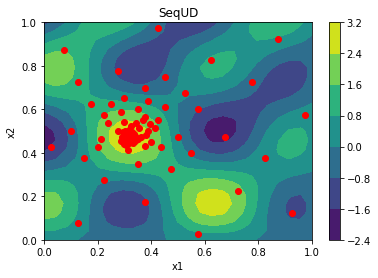

In [42]:
import numpy as np 
from matplotlib import pylab as plt
from seqmml import SeqUD

def octopus(parameters):
    x1 = parameters['x1']
    x2 = parameters['x2']
    y = 2*np.cos(10*x1)*np.sin(10*x2)+np.sin(10*x1*x2)
    return  y

def plot_trajectory(xlim, ylim, func, clf, title):
    grid_num = 25
    xlist = np.linspace(xlim[0], xlim[1], grid_num)
    ylist = np.linspace(ylim[0], ylim[1], grid_num)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros((grid_num,grid_num))
    for i, x1 in enumerate(xlist):
        for j, x2 in enumerate(ylist):
            Z[j,i] = func({"x1": x1, "x2": x2})

    cp = plt.contourf(X, Y, Z)
    plt.scatter(clf.logs.loc[:,['x1']], 
                clf.logs.loc[:,['x2']], color = "red")
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])
    plt.colorbar(cp)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)

Level_Number = 20
ParaSpace = {'x1': {'Type': 'continuous', 'Range': [0,1], 'Wrapper': lambda x: x}, 
             'x2': {'Type': 'continuous', 'Range': [0,1], 'Wrapper': lambda x: x}}

clf = SeqUD(ParaSpace, max_runs = 100, rand_seed = 1, verbose = True)
clf.fmin(octopus)

plot_trajectory([0,1], [0,1], octopus, clf, "SeqUD")